In [1]:
import pandas as pd
import numpy as np
import cv2
from tqdm import tqdm_notebook as tqdm
import gc

In [2]:
HEIGHT = 137
WIDTH = 236

def bbox(img):
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]
    return rmin, rmax, cmin, cmax

def crop_resize(img0, size=(128, 128), pad=16):
    #crop a box around pixels large than the threshold 
    #some images contain line at the sides
    ymin,ymax,xmin,xmax = bbox(img0[5:-5,5:-5] > 80)
    #cropping may cut too much, so we need to add it back
    xmin = xmin - 13 if (xmin > 13) else 0
    ymin = ymin - 10 if (ymin > 10) else 0
    xmax = xmax + 13 if (xmax < WIDTH - 13) else WIDTH
    ymax = ymax + 10 if (ymax < HEIGHT - 10) else HEIGHT
    img = img0[ymin:ymax,xmin:xmax]
    #remove lo intensity pixels as noise
    img[img < 28] = 0
    lx, ly = xmax-xmin,ymax-ymin
    l = max(lx,ly) + pad
    #make sure that the aspect ratio is kept in rescaling
    img = np.pad(img, [((l-ly)//2,), ((l-lx)//2,)], mode='constant')
    img = cv2.resize(img, size)
    return img

In [3]:
size = 128

index = ['image_id'] + [str(i) for i in range(size*size)]
files = [f'data/feather/train_image_data_{i}.feather' for i in range(4)]

for k, file in enumerate(files):
    df = pd.read_feather(file)
    data = 255 - df.iloc[:, 1:].values.reshape(-1, HEIGHT, WIDTH).astype(np.uint8)
    out = pd.DataFrame()
    names = []
    outdata = {}
    for idx in tqdm(range(len(df))):
                name = df.iloc[idx,0]
                img = (data[idx]*(255.0/data[idx].max())).astype(np.uint8)
                img = crop_resize(img).flatten()
                img = pd.Series(img, index=index[1:])
                outdata[name] = img

    out = pd.DataFrame(outdata).T
    del outdata
    out.reset_index(inplace=True)
    out.columns = ['image_id' if x=='index' else x for x in out.columns]
    out = out[index]
    outfname = f'data/train_128_feather/train_{k}.feather'
    out.to_feather(outfname)
    print(f"Saved {outfname}")    
    del out
    gc.collect()



Saved data/train_128_feather/train_0.feather



Saved data/train_128_feather/train_1.feather



Saved data/train_128_feather/train_2.feather



Saved data/train_128_feather/train_3.feather


In [21]:
files = [f'data/train_128_feather/train_{i}.feather' for i in range(4)]
df = pd.read_feather(files[0])
df.head()

,image_id,0,1,2,3,4,5,6,7,8,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,Train_0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Train_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Train_2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Train_3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Train_4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

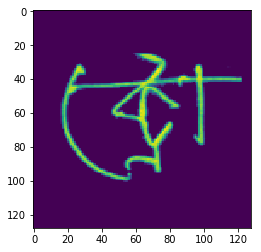

In [28]:
import matplotlib.pyplot as plt
img = df.iloc[0, 1:].values.reshape(128, -1)
plt.imshow(img.astype('float'))

# Some tests

In [8]:
files = [f"/home/timetraveller/Entertainment/BengaliAI_Data/train_image_data_{i}.parquet" for i in range(4)]

In [10]:
df1 = pd.read_parquet(files[0])
df1.head()

,image_id,0,1,2,3,4,5,6,7,8,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Train_0,254,253,252,253,251,252,253,251,251,...,253,253,253,253,253,253,253,253,253,251
1,Train_1,251,244,238,245,248,246,246,247,251,...,255,255,255,255,255,255,255,255,255,254
2,Train_2,251,250,249,250,249,245,247,252,252,...,254,253,252,252,253,253,253,253,251,249
3,Train_3,247,247,249,253,253,252,251,251,250,...,254,254,254,254,254,253,253,252,251,252
4,Train_4,249,248,246,246,248,244,242,242,229,...,255,255,255,255,255,255,255,255,255,255


In [12]:
files = [f"/home/timetraveller/Entertainment/BengaliAI_Data/train_128/train_{i}.feather" for i in range(4)]
dff1 = pd.read_feather(files[0])
dff1.head()

,image_id,0,1,2,3,4,5,6,7,8,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,Train_0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Train_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Train_2,0,0,0,0,0,0,2,3,3,...,1,2,3,3,0,0,0,0,0,0
3,Train_3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Train_4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Convert original to feather data

In [5]:
import gc
from tqdm import tqdm_notebook as tqdm
import pandas as pd
root = "/home/timetraveller/Entertainment/BengaliAI_Data/"
files = [f"{root}train_image_data_{i}.parquet" for i in range(4)]
for i, file in enumerate(tqdm(files)):
    df = pd.read_parquet(file)
    filename = f"{root}orig_feather/train_{i}.feather"
    df.to_feather(filename)
    print(f"Saved {filename}")    
    del df
    gc.collect()

Saved /home/timetraveller/Entertainment/BengaliAI_Data/orig_feather/train_0.feather
Saved /home/timetraveller/Entertainment/BengaliAI_Data/orig_feather/train_1.feather
Saved /home/timetraveller/Entertainment/BengaliAI_Data/orig_feather/train_2.feather
Saved /home/timetraveller/Entertainment/BengaliAI_Data/orig_feather/train_3.feather

